In [260]:
import scipy.io
import pandas as pd
import seaborn as sb
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.markers import MarkerStyle
from seaborn import color_palette
from matplotlib.axes._axes import Axes
from matplotlib.patches import Rectangle
from numpy import ndarray
from statsmodels.multivariate.manova import MANOVA
from scipy import stats
from statsmodels.stats.anova import AnovaRM
import numpy as np
import math
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.patheffects as path_effects



In [261]:
path = "/Users/jennlauralee/GitHub Repos/sftp-canada.github.io/202310 mcgill counterrecruitment/cobreakdown.xlsx"

T = pd.read_excel(path)

In [262]:
np.unique(T['Type of Company'])

array(['HR services', 'construction', 'defense contractor', 'electronics',
       'finance', 'food and agriculture', 'government',
       'marketing / consulting', 'mining / mining contractor',
       'oil and gas / oil and gas contractor', 'retail', 'software',
       'surveillance', 'telecomm', 'transportation / supply chain'],
      dtype=object)

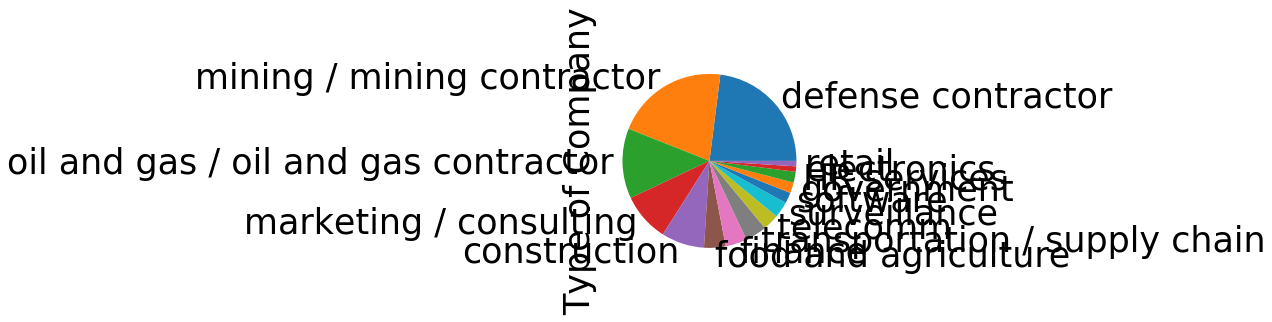

In [263]:
T['Type of Company'].value_counts().plot(kind="pie")

In [264]:
# Group misc into others?

t = T
# othergroup = ~t['Type of Company'].isin(['mining / mining contractor', 'oil and gas / oil and gas contractor', 'defense contractor'])


othergroup = ~t['Type of Company'].isin(['mining / mining contractor', 
                                         'oil and gas / oil and gas contractor', 
                                         'defense contractor',
                                        'marketing / consulting',
                                        'construction',
                                        'finance',
                                        'telecomm',
                                        'food and agriculture',
                                        'transportation / supply chain'])



In [265]:
t['Type of Company'][othergroup] = 'other'

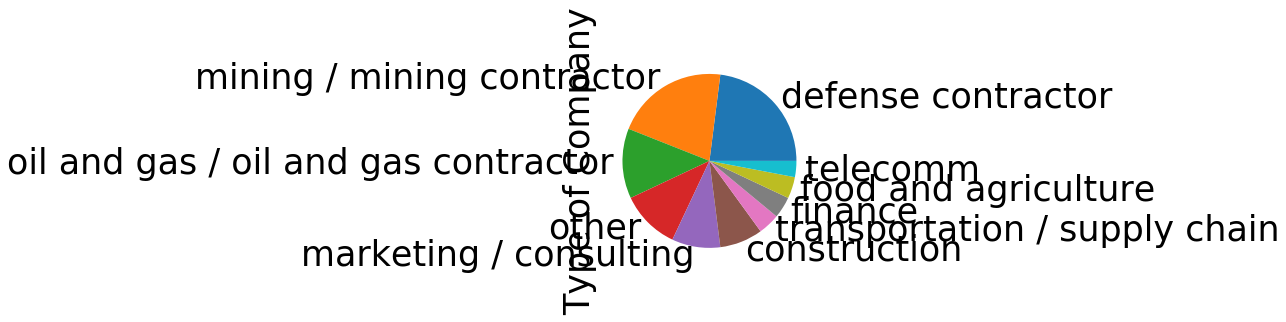

In [266]:
# explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

ax = t['Type of Company'].value_counts().plot(kind="pie")

In [267]:
t['Type of Company'].value_counts().index

Index(['defense contractor', 'mining / mining contractor',
       'oil and gas / oil and gas contractor', 'other',
       'marketing / consulting', 'construction',
       'transportation / supply chain', 'finance', 'food and agriculture',
       'telecomm'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7fb685a66750>,
 [Text(0.975144379250797, 0.8597054377026924, 'defense'),
  Text(-0.6617538467613845, 1.1189646313876547, 'mining'),
  Text(-1.29935852969886, -0.04083394787205458, 'oil and gas'),
  Text(-0.7778174957174647, -0.7778174228929382, 'other'),
  Text(-0.172077952232839, -1.086457168210212, 'marketing and consulting'),
  Text(0.4049369753957134, -1.0227541473674753, 'construction'),
  Text(0.7530017842388484, -0.8018655204790334, 'finance'),
  Text(0.9287606910118115, -0.5894095170857548, 'telecomm'),
  Text(1.0461621504206509, -0.3399187476842657, 'food and agriculture'),
  Text(1.095118155223859, -0.10351920642611424, 'transporation and supply chain')],
 [Text(0.712605507914044, 0.6282462813981213, '23'),
  Text(-0.4835893495563963, 0.8177049229371323, '21'),
  Text(-0.9495312332414745, -0.029840192675732187, '13'),
  Text(-0.5303301107164532, -0.530330061063367, '11'),
  Text(-0.11732587652239021, -0.7407662510524173, '9'),
  Text(0.2760933

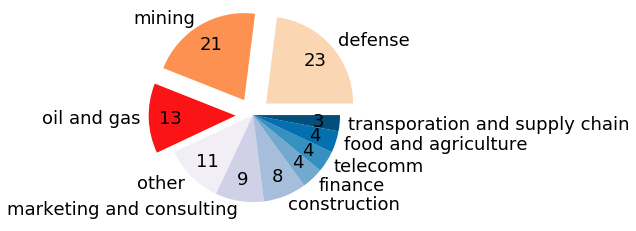

In [268]:
plt.rc('font', size=18)
explode=[0.2,0.2,0.2,0,0,0,0,0,0,0]
plt.pie(t['Type of Company'].value_counts(),labels=['defense','mining','oil and gas', 'other', 'marketing and consulting','construction','finance','telecomm','food and agriculture','transporation and supply chain'],
        explode=explode,
        startangle = 0,
       colors=['#fbd6b2','#fc9152','#fb1316',
               '#f1eef6','#d0d1e6','#a6bddb','#74a9cf','#3690c0','#0570b0','#034e7b'],
              #'#2bc209','#00d692','#00e2dc','#a0e8fa','#00b1f9','#0071f2','#2c09c2'],
       autopct='%.f',
       pctdistance=0.75,)


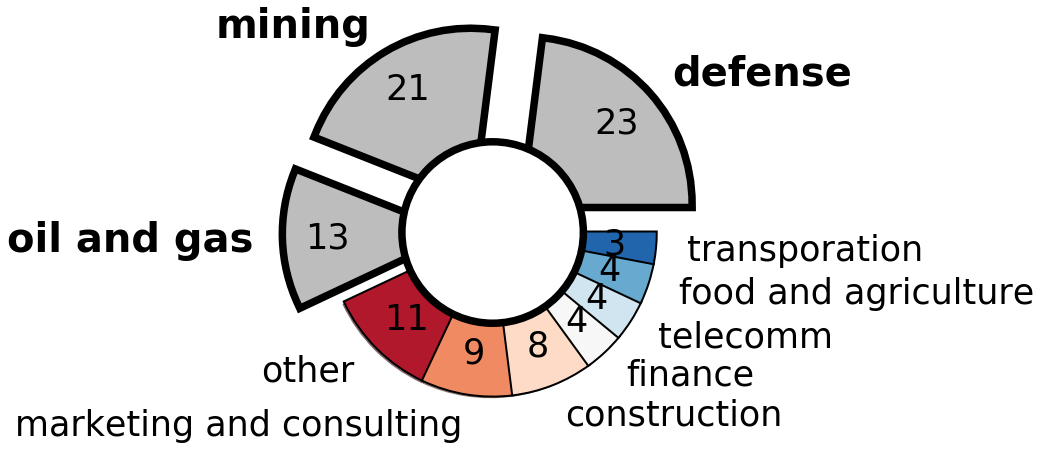

In [271]:
plt.rc('font', size=35)
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

# explode=[0.3,0.3,0.3,0,0,0,0,0,0,0]
explode=[0.4,0.4,0.4,0,0,0,0,0,0,0]
labels = ['defense','mining','oil and gas', 'other', 'marketing and consulting','construction','finance','telecomm','food and agriculture','transporation']
patches, texts, autotexts = plt.pie(t['Type of Company'].value_counts(),labels=labels,
        explode=explode,
        startangle = 0,
       colors=[#'#ef3b2c','#cb181d','#99000d',
#            '#d9d9d9',
#            '#bdbdbd',
#            '#737373',
           
           '#bdbdbd',
           '#bdbdbd',
           '#bdbdbd',
'#b2182b',
'#ef8a62',
'#fddbc7',
'#f7f7f7',
'#d1e5f0',
'#67a9cf',
'#2166ac'],
              # '#fbb4ae',
#                 '#b3cde3',
#                 '#ccebc5',
#                 '#decbe4',
#                 '#fed9a6',
#                 '#ffffcc',
#                 '#e5d8bd' ],            
       autopct='%.f',
       pctdistance=0.75,
       labeldistance=1.2,
       shadow=[10,10,1,0,0,0,0,0,0,0],
       radius=1.5)
for patch in patches[0:3]:
    patch.set_path_effects([path_effects.SimpleLineShadow(linewidth=15, offset=(0,0), shadow_color='k',alpha=1),
        path_effects.Normal()])
for patch in patches[3:10]:
    patch.set_path_effects([path_effects.SimpleLineShadow(linewidth=4, offset=(0,0), shadow_color='k',alpha=1),
        path_effects.Normal()])

# draw circle
centre_circle = plt.Circle((0, 0), 0.80, fc='white')
centre_circle.set_path_effects([path_effects.SimpleLineShadow(linewidth=15, offset=(0,0), shadow_color='k',alpha=1),
        path_effects.Normal()])
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

for text in texts[0:3]:
    text.set_fontsize(40)
    text.set_fontweight('heavy')
# for text in texts[3:10]:
#     text.set_fontsize(0)
    
# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
# kw = dict(arrowprops=dict(arrowstyle="-"),
#           #bbox=bbox_props, 
#           zorder=0, va="center")

# for i, p in enumerate(patches):
#     ang = (p.theta2 - p.theta1)/2. + p.theta1
#     y = np.sin(np.deg2rad(ang))
#     x = np.cos(np.deg2rad(ang))
#     horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#     connectionstyle = f"angle,angleA=0,angleB={ang}"
#     kw["arrowprops"].update({"connectionstyle": connectionstyle})
# #     if i in [0,1,2]:
# #         ax.annotate(labels[i], xy=(x, y), xytext=(3*np.sign(x), 1.4*y),
# #                     horizontalalignment='center',
# #                     verticalalignment='center',
# #                     **kw, weight='bold',size=40)
# #     else:
#     if i in np.arange(3,10):
#         ax.annotate(labels[i], xy=(x, y), xytext=(1.7*np.sign(x), 1.8*y),
#             horizontalalignment=horizontalalignment, **kw)

# plt.show()

In [270]:
texts


[Text(1.6502443341167332, 1.4548861253430176, 'defense'),
 Text(-1.1198911252884967, 1.8936324531175692, 'mining'),
 Text(-2.198914434874993, -0.06910360409116928, 'oil and gas'),
 Text(-1.2727922657194874, -1.2727921465520806, 'other'),
 Text(-0.2815821036537365, -1.7778390025258013, 'marketing and consulting'),
 Text(0.6626241415566219, -1.673597695692232, 'construction'),
 Text(1.2321847378453883, -1.3121435789656906, 'finance'),
 Text(1.5197902216556913, -0.9644883006857804, 'telecomm'),
 Text(1.7119017006883375, -0.5562306780287983, 'food and agriculture'),
 Text(1.7920115267299506, -0.1693950650609142, 'transporation')]